In [189]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, CategoricalEncoder
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

In [2]:
# Read in the tsv file
df = pd.read_csv('dropna_join.csv')
df

,CASEID,V1144,V5114,V5118,V5113,V5115,V5112,V4428,V4433,V6305,...,EMP,AGE,MARSTAT,REL,SEX,DEPREC,ALCALT1,ALCALT2,DRGALT2,DRGALT1
0,20001,NO,VERY,A LITTLE,SOMEWHAT,SOMEWHAT,SOMEWHAT,A LITTLE TRUE,VERY TRUE,YES,...,Homemaker,54,Marswd,Protestant,Female,>6 Months & <= 1 Year,Present,Absent,Present,Present
1,20011,NO,SOMEWHAT,SOMEWHAT,SOMEWHAT,SOMEWHAT,SOMEWHAT,VERY TRUE,VERY TRUE,NO,...,"Working, incl. temp. laid off, matern./s",16,Marnev,Catholic,Female,>1 Month & <=6 Months,Absent,Absent,Absent,Absent
2,20015,YES,A LITTLE,NOT AT ALL,A LITTLE,A LITTLE,A LITTLE,VERY TRUE,NOT TRUE AT ALL,YES,...,Homemaker,37,Marcoh,"No Preference, None",Female,<= 1 Month,Present,Absent,Absent,Present
3,20021,NO,SOMEWHAT,NOT AT ALL,A LITTLE,SOMEWHAT,SOMEWHAT,VERY TRUE,A LITTLE TRUE,NO,...,Homemaker,36,Marswd,Protestant,Female,>1 Month & <=6 Months,Present,Absent,Absent,Present
4,20033,NO,A LITTLE,A LITTLE,A LITTLE,A LITTLE,SOMEWHAT,A LITTLE TRUE,NOT TRUE AT ALL,NO,...,"Working, incl. temp. laid off, matern./s",35,Marcoh,Protestant,Male,> 1 Year,Absent,Absent,Absent,Absent
5,20034,NO,NOT AT ALL,A LITTLE,NOT AT ALL,A LITTLE,SOMEWHAT,SOMEWHAT TRUE,VERY TRUE,NO,...,"Working, incl. temp. laid off, matern./s",30,Marnev,Protestant,Female,>6 Months & <= 1 Year,Absent,Absent,Absent,Absent
6,20046,NO,VERY,VERY,VERY,VERY,VERY,VERY TRUE,VERY TRUE,NO,...,Other,41,Marcoh,Protestant,Female,<= 1 Month,Absent,Absent,Absent,Absent
7,20048,YES,VERY,A LITTLE,SOMEWHAT,SOMEWHAT,VERY,SOMEWHAT TRUE,SOMEWHAT TRUE,NO,...,Other,34,Marcoh,Protestant,Male,>1 Month & <=6 Months,Absent,Absent,Present,Present
8,20054,NO,A LITTLE,A LITTLE,A LITTLE,A LITTLE,A LITTLE,SOMEWHAT TRUE,A LITTLE TRUE,NO,...,"Working, incl. temp. laid off, matern./s",39,Marswd,Catholic,Male,> 1 Year,Present,Absent,Absent,Present
9,20062,NO,NOT AT ALL,A LITTLE,A LITTLE,NOT AT ALL,A LITTLE,NOT TRUE AT ALL,A LITTLE TRUE,NO,...,"Working, incl. temp. laid off, matern./s",40,Marcoh,Protestant,Male,> 1 Year,Present,Absent,Absent,Absent


In [25]:
DS_suicide_factors = ['AGE', 'SEX', 'EDCAT', 'RACE', 'REL', 'EMP', 'DEPREC',\
                       'ALCALT1', 'ALCALT2', 'DRGALT1', 'DRGALT2', 'V5114',\
                       'V5118', 'V5113', 'V5115', 'V5112', 'V4428',\
                       'V4433', 'V6305', 'V6301', 'V5225', 'V6649', 'V6749',\
                       'V5918', 'V6143', 'V6126', 'V6114', 'V101', 'V102', 'V6215']
DS1_suicide_response = ['V1144']

In [36]:
num_attribs = ['AGE']
cat_attribs=DS_suicide_factors[1:]
print(cat_attribs)

['SEX', 'EDCAT', 'RACE', 'REL', 'EMP', 'DEPREC', 'ALCALT1', 'ALCALT2', 'DRGALT1', 'DRGALT2', 'V5114', 'V5118', 'V5113', 'V5115', 'V5112', 'V4428', 'V4433', 'V6305', 'V6301', 'V5225', 'V6649', 'V6749', 'V5918', 'V6143', 'V6126', 'V6114', 'V101', 'V102', 'V6215']


In [37]:
df['V1144'].value_counts()

NO     1116
YES     229
Name: V1144, dtype: int64

In [38]:
for var in cat_attribs:
    print(df.groupby([var, 'V1144'])[var].agg('count'))

SEX     V1144
Female  NO       708
        YES      166
Male    NO       408
        YES       63
Name: SEX, dtype: int64
EDCAT        V1144
0-11 Years   NO       159
             YES       62
12 Years     NO       334
             YES       83
13-15 Years  NO       352
             YES       58
16+ Years    NO       271
             YES       26
Name: EDCAT, dtype: int64
RACE      V1144
Black     NO        97
          YES       19
Hispanic  NO        95
          YES       25
Other     NO        34
          YES        7
White     NO       890
          YES      178
Name: RACE, dtype: int64
REL                  V1144
Catholic             NO       286
                     YES       58
No Preference, None  NO       123
                     YES       24
Other                NO        90
                     YES       24
Protestant           NO       617
                     YES      123
Name: REL, dtype: int64
EMP                                       V1144
Homemaker                    

In [39]:
dummies_df = pd.get_dummies(df.drop(columns = ['V1144']))

In [40]:
dummies_df['response'] = df['V1144']

In [188]:
dummies_df.head()

,CASEID,AGE,V5114_A LITTLE,V5114_INAP,V5114_NOT AT ALL,V5114_SOMEWHAT,V5114_VERY,V5118_A LITTLE,V5118_DK,V5118_INAP,...,DEPREC_>6 Months & <= 1 Year,ALCALT1_Absent,ALCALT1_Present,ALCALT2_Absent,ALCALT2_Present,DRGALT2_Absent,DRGALT2_Present,DRGALT1_Absent,DRGALT1_Present,response
0,20001,54,0,0,0,0,1,1,0,0,...,1,0,1,1,0,0,1,0,1,NO
1,20011,16,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,NO
2,20015,37,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,YES
3,20021,36,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,NO
4,20033,35,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,NO


In [41]:
# Make a train-test split:
train_set, test_set = train_test_split(dummies_df, random_state=1, stratify=dummies_df['response'])

In [42]:
print(train_set.shape, test_set.shape)

(1008, 120) (337, 120)


In [48]:
train_set.columns.tolist()

['CASEID',
 'AGE',
 'V5114_A LITTLE',
 'V5114_INAP',
 'V5114_NOT AT ALL',
 'V5114_SOMEWHAT',
 'V5114_VERY',
 'V5118_A LITTLE',
 'V5118_DK',
 'V5118_INAP',
 'V5118_NOT AT ALL',
 'V5118_SOMEWHAT',
 'V5118_VERY',
 'V5113_A LITTLE',
 'V5113_INAP',
 'V5113_NOT AT ALL',
 'V5113_SOMEWHAT',
 'V5113_VERY',
 'V5115_A LITTLE',
 'V5115_INAP',
 'V5115_NOT AT ALL',
 'V5115_SOMEWHAT',
 'V5115_VERY',
 'V5112_A LITTLE',
 'V5112_INAP',
 'V5112_NOT AT ALL',
 'V5112_SOMEWHAT',
 'V5112_VERY',
 'V4428_A LITTLE TRUE',
 'V4428_INAP',
 'V4428_NOT TRUE AT ALL',
 'V4428_SOMEWHAT TRUE',
 'V4428_VERY TRUE',
 'V4433_A LITTLE TRUE',
 'V4433_INAP',
 'V4433_NOT TRUE AT ALL',
 'V4433_SOMEWHAT TRUE',
 'V4433_VERY TRUE',
 'V6305_INAP',
 'V6305_NO',
 'V6305_YES',
 'V6301_INAP',
 'V6301_NO',
 'V6301_YES',
 'V5225_A LITTLE',
 'V5225_A LOT',
 'V5225_INAP',
 'V5225_NOT AT ALL',
 'V5225_SOME',
 'V6649_DK',
 'V6649_INAP',
 'V6649_NO',
 'V6649_YES',
 'V6749_DK',
 'V6749_INAP',
 'V6749_NO',
 'V6749_YES',
 'V5918_INAP',
 'V5918_NE

In [53]:
cat_attribs = train_set.columns.tolist()
cat_attribs.remove('CASEID')
cat_attribs.remove('AGE')
cat_attribs.remove('response')

In [55]:
print("train: ")
print(train_set['response'].value_counts())
print("test: ")
print(test_set['response'].value_counts())

train: 
NO     836
YES    172
Name: response, dtype: int64
test: 
NO     280
YES     57
Name: response, dtype: int64


In [190]:
# Define a method to select attributes from a DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

# We will need this later
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('std_scaler', StandardScaler())
    #('encoder', LabelBinarizer(sparse=False, handle_unknown='ignore'))
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])


In [191]:
y_train = train_set['response']

# Prepare the training data with the pipeline above
X_train_prepared = full_pipeline.fit_transform(train_set)
X_train_prepared

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.1740027 , -0.79939001, -0.0836242 , ..., -0.27107642,
        -1.8601551 ,  1.8601551 ],
       [-0.81456178, -0.79939001, -0.0836242 , ..., -0.27107642,
         0.53758958, -0.53758958],
       [-0.51627711,  1.25095383, -0.0836242 , ..., -0.27107642,
         0.53758958, -0.53758958],
       ...,
       [ 0.08029224, -0.79939001, -0.0836242 , ..., -0.27107642,
        -1.8601551 ,  1.8601551 ],
       [ 0.27914868,  1.25095383, -0.0836242 , ..., -0.27107642,
         0.53758958, -0.53758958],
       [-0.21799244,  1.25095383, -0.0836242 , ..., -0.27107642,
         0.53758958, -0.53758958]])

In [192]:
X_test_prepared = full_pipeline.transform(test_set)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [193]:
X_test_prepared.shape

(337, 118)

In [194]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prepared, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
tree_pred = tree_clf.predict(X_test_prepared)

In [196]:
from sklearn.metrics import classification_report
y_train_pred = tree_clf.predict(X_train_prepared)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

          NO       1.00      1.00      1.00       836
         YES       1.00      1.00      1.00       172

   micro avg       1.00      1.00      1.00      1008
   macro avg       1.00      1.00      1.00      1008
weighted avg       1.00      1.00      1.00      1008



In [197]:
tree_clf.classes_

array(['NO', 'YES'], dtype=object)

In [198]:
y_test = test_set['response']

In [199]:
y_test_pred = tree_clf.predict(X_test_prepared)

In [200]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          NO       0.92      0.91      0.92       280
         YES       0.59      0.60      0.59        57

   micro avg       0.86      0.86      0.86       337
   macro avg       0.75      0.76      0.75       337
weighted avg       0.86      0.86      0.86       337



# Logistic Regression Classifier with L1-Regularization

In [201]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=10000, multi_class='auto', n_jobs=-1,verbose=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False)

In [202]:
classifier.fit(X_train_prepared, y_train,)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 539 epochs took 2 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False)

In [203]:
print(f"Training Data Score: {classifier.score(X_train_prepared, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_prepared, y_test)}")

Training Data Score: 0.8948412698412699
Testing Data Score: 0.8694362017804155


In [204]:
y_test_pred = classifier.predict(X_test_prepared)

In [205]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          NO       0.91      0.94      0.92       280
         YES       0.64      0.53      0.58        57

   micro avg       0.87      0.87      0.87       337
   macro avg       0.77      0.73      0.75       337
weighted avg       0.86      0.87      0.86       337



In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
import seaborn as sns

In [208]:
conf_mx = confusion_matrix(y_test, y_test_pred)

In [209]:
classifier.classes_

array(['NO', 'YES'], dtype=object)

In [210]:
conf_df= pd.DataFrame(conf_mx, index=classifier.classes_, columns=classifier.classes_)

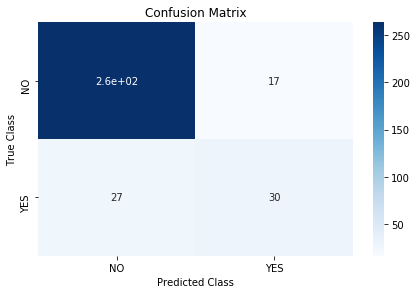

In [211]:
import matplotlib.pyplot as plt
sns.heatmap(conf_df, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Consider a dummy classifier

In [212]:
from sklearn.dummy import DummyClassifier

In [213]:
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

In [214]:
dummy.fit(X_train_prepared, y_train)

DummyClassifier(constant=None, random_state=1, strategy='most_frequent')

In [215]:
dummy.score(X_test_prepared, y_test)

0.8308605341246291

In [216]:
dummy.classes_

array(['NO', 'YES'], dtype=object)

In [217]:
dummy2 = DummyClassifier(strategy='constant', random_state=1, constant='NO')

In [218]:
dummy2.fit(X_train_prepared, y_train)

DummyClassifier(constant='NO', random_state=1, strategy='constant')

In [219]:
dummy.score(X_test_prepared, y_test)   # same as 'most_frequent'

0.8308605341246291

# Fitting with CV scoring

In [220]:
from sklearn.model_selection import cross_val_score

In [221]:
cross_val_score(classifier, X_train_prepared, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished


array([0.84569733, 0.89880952, 0.84776119])

In [222]:
from sklearn.model_selection import cross_val_predict

In [223]:
y_cv_train_pred = cross_val_predict(classifier, X_train_prepared, y_train, cv=5, n_jobs=-1)

In [224]:
confusion_matrix(y_train, y_cv_train_pred)

array([[784,  52],
       [ 87,  85]], dtype=int64)

In [225]:
from sklearn.metrics import precision_score, recall_score

In [226]:
precision_score(y_train, y_cv_train_pred, average='weighted')

0.8523921727157374

In [227]:
recall_score(y_train, y_cv_train_pred, average='weighted')

0.8621031746031746

# Finding the Best Regularization Parameter

In [228]:
from sklearn.model_selection import GridSearchCV

In [229]:
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 50]}

In [230]:
grid = GridSearchCV(classifier, param_grid, verbose=3, n_jobs=-1)

In [231]:
grid.fit(X_train_prepared, y_train)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 out of  18 | elapsed:    2.7s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    4.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  16 out of  18 | elapsed:    6.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 631 epochs took 2 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [232]:
print(grid.best_score_)

0.8690476190476191


In [233]:
print(grid.best_params_)

{'C': 0.1}


## Refine the search around the optimal value found above

In [234]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]}

In [235]:
grid = GridSearchCV(classifier, param_grid, verbose=3, n_jobs=-1)

In [236]:
grid.fit(X_train_prepared, y_train)

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   2 out of  18 | elapsed:    1.7s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done  16 out of  18 | elapsed:    7.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


convergence after 1811 epochs took 4 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=-1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [237]:
grid.best_params_

{'C': 0.05}

In [238]:
grid.best_score_

0.8690476190476191

# Feature Importances
The logistic regression model does not produced estimated feature importances.

In [239]:
# The estimated coefficients
fit_coefs = classifier.coef_

# magnitudes of importance 
fit_zvals = np.std(X_test_prepared, 0)*fit_coefs

In [240]:
attributes = num_attribs + cat_attribs
attributes

['AGE',
 'V5114_A LITTLE',
 'V5114_INAP',
 'V5114_NOT AT ALL',
 'V5114_SOMEWHAT',
 'V5114_VERY',
 'V5118_A LITTLE',
 'V5118_DK',
 'V5118_INAP',
 'V5118_NOT AT ALL',
 'V5118_SOMEWHAT',
 'V5118_VERY',
 'V5113_A LITTLE',
 'V5113_INAP',
 'V5113_NOT AT ALL',
 'V5113_SOMEWHAT',
 'V5113_VERY',
 'V5115_A LITTLE',
 'V5115_INAP',
 'V5115_NOT AT ALL',
 'V5115_SOMEWHAT',
 'V5115_VERY',
 'V5112_A LITTLE',
 'V5112_INAP',
 'V5112_NOT AT ALL',
 'V5112_SOMEWHAT',
 'V5112_VERY',
 'V4428_A LITTLE TRUE',
 'V4428_INAP',
 'V4428_NOT TRUE AT ALL',
 'V4428_SOMEWHAT TRUE',
 'V4428_VERY TRUE',
 'V4433_A LITTLE TRUE',
 'V4433_INAP',
 'V4433_NOT TRUE AT ALL',
 'V4433_SOMEWHAT TRUE',
 'V4433_VERY TRUE',
 'V6305_INAP',
 'V6305_NO',
 'V6305_YES',
 'V6301_INAP',
 'V6301_NO',
 'V6301_YES',
 'V5225_A LITTLE',
 'V5225_A LOT',
 'V5225_INAP',
 'V5225_NOT AT ALL',
 'V5225_SOME',
 'V6649_DK',
 'V6649_INAP',
 'V6649_NO',
 'V6649_YES',
 'V6749_DK',
 'V6749_INAP',
 'V6749_NO',
 'V6749_YES',
 'V5918_INAP',
 'V5918_NEVER',
 'V59

In [241]:
for feat_imp in sorted(zip(fit_zvals[0], attributes), reverse=True):
    print(feat_imp)

(0.8013153714569126, 'V6301_YES')
(0.42821175093172414, 'V6305_YES')
(0.340422483898595, 'EDCAT_0-11 Years')
(0.3208617141864773, 'V6215_ALL OTHERS')
(0.2433289105354481, 'V6126_YES')
(0.22784666888398403, 'V5115_A LITTLE')
(0.21310226892922768, 'V102_POOR')
(0.19311462518990352, 'DEPREC_> 1 Year')
(0.19208286537779645, 'V6749_INAP')
(0.190271187756934, 'V102_EXCELLENT')
(0.17251722289818894, 'V6114_YES')
(0.16645268555008277, 'V102_FAIR')
(0.16449846661700054, 'V5114_VERY')
(0.1598066713355605, 'V5918_NEVER')
(0.1489838873851852, 'V6649_INAP')
(0.1371324940795489, 'REL_Catholic')
(0.1354247794303362, 'EMP_Other')
(0.1194727919634754, 'V4428_NOT TRUE AT ALL')
(0.11569053873853802, 'V5118_SOMEWHAT')
(0.10971489845666725, 'V101_GOOD')
(0.10112433272544058, 'EDCAT_12 Years')
(0.09984777748925651, 'V4433_VERY TRUE')
(0.0850271253312451, 'MARSTAT_Marcoh')
(0.08406579757409013, 'V5114_NOT AT ALL')
(0.08130783525600017, 'V5225_A LOT')
(0.06361001352549267, 'ALCALT1_Present')
(0.05510074825368

Computing regularization path ...
This took 239.526s


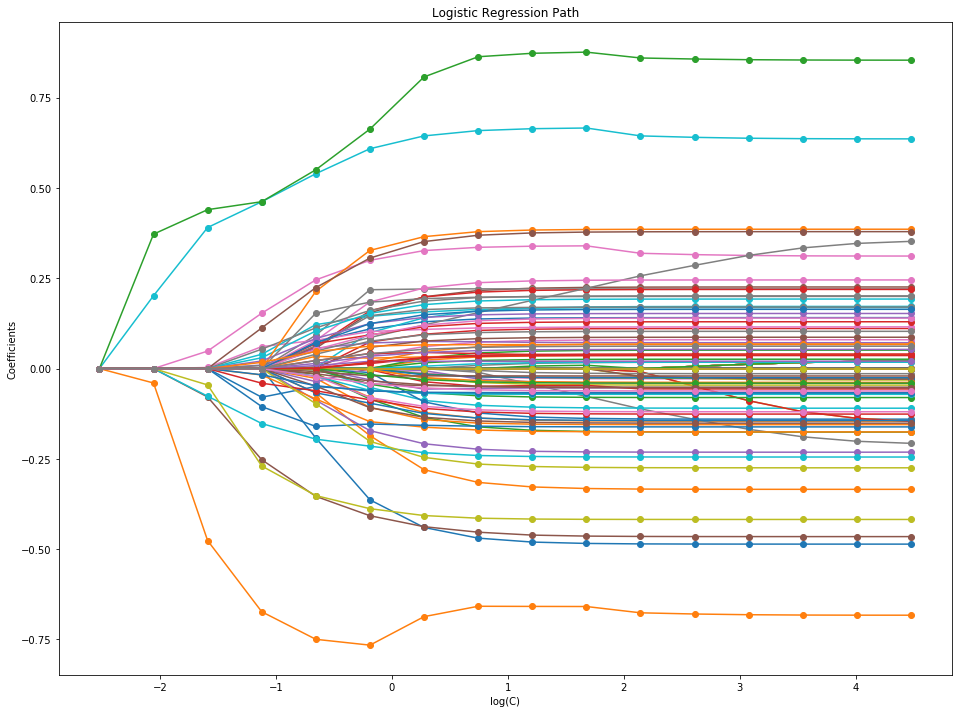

In [242]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.svm import l1_min_c

X = X_train_prepared
y = y_train

#X /= X.max()  # Normalize X to speed-up convergence

# #############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss='log') * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True, n_jobs=-1)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("This took %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.figure(figsize=(16,12))
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.axis('tight')
plt.show()

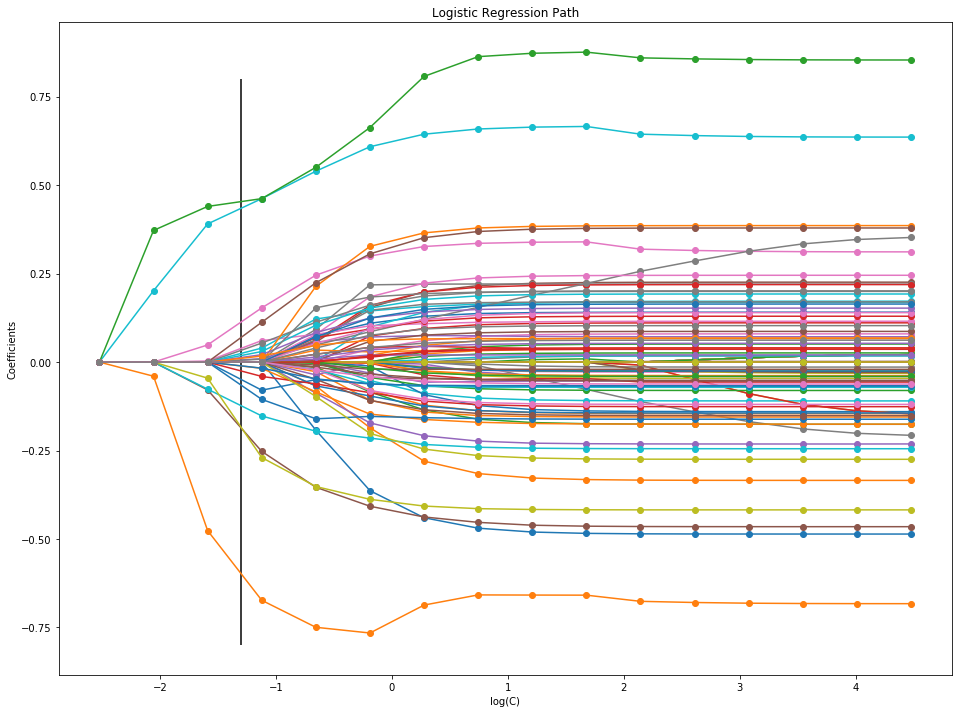

In [247]:
coefs_ = np.array(coefs_)
plt.figure(figsize=(16,12))
plt.plot(np.log10(cs), coefs_, marker='o')
ymin, ymax = plt.ylim()
plt.xlabel('log(C)')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Path')
plt.vlines(np.log10(0.05), ymin=-0.8, ymax=0.8)
plt.axis('tight')
plt.show()

In [243]:
np.log10(0.05)

-1.3010299956639813

In [248]:
y_scores = cross_val_predict(classifier, X_train_prepared, y_train, cv=3, method="decision_function", n_jobs=-1)

In [249]:
from sklearn.metrics import roc_curve

In [250]:
y_train_0 = pd.get_dummies(y_train, drop_first=True).values

In [251]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

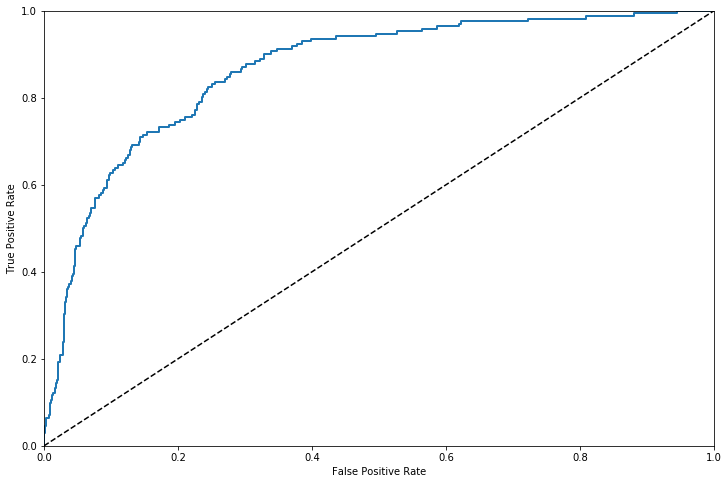

In [252]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [253]:
df.shape

(1345, 33)

# Logistic Regression

In [186]:
import statsmodels.api as sm

In [255]:
attributes

['AGE',
 'V5114_A LITTLE',
 'V5114_INAP',
 'V5114_NOT AT ALL',
 'V5114_SOMEWHAT',
 'V5114_VERY',
 'V5118_A LITTLE',
 'V5118_DK',
 'V5118_INAP',
 'V5118_NOT AT ALL',
 'V5118_SOMEWHAT',
 'V5118_VERY',
 'V5113_A LITTLE',
 'V5113_INAP',
 'V5113_NOT AT ALL',
 'V5113_SOMEWHAT',
 'V5113_VERY',
 'V5115_A LITTLE',
 'V5115_INAP',
 'V5115_NOT AT ALL',
 'V5115_SOMEWHAT',
 'V5115_VERY',
 'V5112_A LITTLE',
 'V5112_INAP',
 'V5112_NOT AT ALL',
 'V5112_SOMEWHAT',
 'V5112_VERY',
 'V4428_A LITTLE TRUE',
 'V4428_INAP',
 'V4428_NOT TRUE AT ALL',
 'V4428_SOMEWHAT TRUE',
 'V4428_VERY TRUE',
 'V4433_A LITTLE TRUE',
 'V4433_INAP',
 'V4433_NOT TRUE AT ALL',
 'V4433_SOMEWHAT TRUE',
 'V4433_VERY TRUE',
 'V6305_INAP',
 'V6305_NO',
 'V6305_YES',
 'V6301_INAP',
 'V6301_NO',
 'V6301_YES',
 'V5225_A LITTLE',
 'V5225_A LOT',
 'V5225_INAP',
 'V5225_NOT AT ALL',
 'V5225_SOME',
 'V6649_DK',
 'V6649_INAP',
 'V6649_NO',
 'V6649_YES',
 'V6749_DK',
 'V6749_INAP',
 'V6749_NO',
 'V6749_YES',
 'V5918_INAP',
 'V5918_NEVER',
 'V59

In [275]:
df_with_dummies = pd.get_dummies(df.drop(columns = ['CASEID', 'V1144']), drop_first=True)
response = pd.get_dummies(df.V1144, drop_first=True)
logit = sm.Logit(response, df_with_dummies.astype(float))

In [276]:
df_with_dummies.head()

,AGE,V5114_INAP,V5114_NOT AT ALL,V5114_SOMEWHAT,V5114_VERY,V5118_DK,V5118_INAP,V5118_NOT AT ALL,V5118_SOMEWHAT,V5118_VERY,...,REL_Other,REL_Protestant,SEX_Male,DEPREC_> 1 Year,DEPREC_>1 Month & <=6 Months,DEPREC_>6 Months & <= 1 Year,ALCALT1_Present,ALCALT2_Present,DRGALT2_Present,DRGALT1_Present
0,54,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,1
1,16,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,37,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,36,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4,35,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0


In [361]:
result = logit.fit(maxiter=10000, method='nm')

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 7328
         Function evaluations: 8651


C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [362]:
# We see that the logit non-regularized fit struggles with numerical instability

In [363]:
result.summary()

C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\statsmodels\discrete\discrete_model.py:3313: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\dadra\anaconda\Anaconda3\envs\PythonWebMongo\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: inval

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    YES   No. Observations:                 1345
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                           76
Date:                Fri, 02 Aug 2019   Pseudo R-squ.:                     nan
Time:                        19:29:45   Log-Likelihood:                 0.0000
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
AGE                                              2.3591        nan        nan        nan         nan         nan
V5114_INAP                                      -0.0271        nan        nan        nan         nan         nan
V5114_NOT AT ALL                                -0.2512        nan        nan        nan         nan         nan
V5114_SOMEWHAT                                  -0.0870        nan        nan        nan         nan         nan
V5114_VERY                                      -0.0391        nan        nan        nan         nan         nan
V5118_DK                                         0.8308        nan        nan        nan         nan         nan
V5118_INAP                                      -0.0334        nan        nan        nan         nan         nan
V5118_NOT AT ALL                                -0.1550        nan        nan        nan         nan         nan
V5118_SOMEWHAT                                  -1.0148        nan        nan        nan         nan         nan
V5118_VERY                                      -0.0540        nan        nan        nan         nan         nan
V5113_INAP                                      -1.2266        nan        nan        nan         nan         nan
V5113_NOT AT ALL                                -0.1020        nan        nan        nan         nan         nan
V5113_SOMEWHAT                                   0.4346        nan        nan        nan         nan         nan
V5113_VERY                                      -0.2353        nan        nan        nan         nan         nan
V5115_INAP                                      -0.4882        nan        nan        nan         nan         nan
V5115_NOT AT ALL                                -0.1770        nan        nan        nan         nan         nan
V5115_SOMEWHAT                                  -0.7385        nan        nan        nan         nan         nan
V5115_VERY                                       0.3890        nan        nan        nan         nan         nan
V5112_INAP                                       0.0038        nan        nan        nan         nan         nan
V5112_NOT AT ALL                                -0.0962        nan        nan        nan         nan         nan
V5112_SOMEWHAT                                   0.1999        nan        nan        nan         nan         nan
V5112_VERY                                       0.0428        nan        nan        nan         nan         nan
V4428_INAP                                       0.0213        nan        nan        nan         nan         nan
V4428_NOT TRUE AT ALL                            0.1498        nan        nan        nan         nan         nan
V4428_SOMEWHAT TRUE                              0.1899        nan        nan        nan         nan         nan
V4428_VERY TRUE                                  0.4512        nan        nan

In [364]:
# odds ratios only
for items in sorted(zip(np.exp(result.params), result.params.index.tolist()), reverse=True):
    print(items)

(10.581793846380421, 'AGE')
(2.755876175979522, 'V6126_YES')
(2.6114785462365626, 'V6143_NO')
(2.2950894451286707, 'V5118_DK')
(2.207688237316793, 'V102_VERY GOOD')
(2.1366716014287053, 'V6301_YES')
(1.8775466900524773, 'REL_No Preference, None')
(1.5702516397228412, 'V4428_VERY TRUE')
(1.5444114682706929, 'V5113_SOMEWHAT')
(1.4981372894687603, 'V6749_INAP')
(1.4755439246565696, 'V5115_VERY')
(1.3868394080138569, 'V101_GOOD')
(1.2910070660972899, 'V6114_INAP')
(1.280929341458594, 'V102_POOR')
(1.2731384514165471, 'MARSTAT_Marswd')
(1.2522818611416293, 'REL_Protestant')
(1.2387156431635067, 'V4433_VERY TRUE')
(1.2227025635347801, 'V6215_TWO OR MORE YES RESPONSES IN U1-U12')
(1.2212774156786212, 'V5112_SOMEWHAT')
(1.2091642950975299, 'V4428_SOMEWHAT TRUE')
(1.204925345730813, 'V6749_NO')
(1.1662079873745943, 'V101_POOR')
(1.164558645434557, 'V6305_YES')
(1.16160167902851, 'V4428_NOT TRUE AT ALL')
(1.14720328865593, 'V101_VERY GOOD')
(1.1391664838385476, 'ALCALT2_Present')
(1.118206586641